In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io.wavfile as wav
import sys
import sounddevice as sd

# Add the current directory to the path so we can import our modules
sys.path.append(".")

from plot import plot_continuous, plot_continuous_discrete
from frames import non_overlapping_frames, overlapping_frames
from fundamental_frecuency import calculate_fundamental_frequency
from collections import namedtuple

## Ejercicio 1.1
Escuchamos las señales y las representamos en el tiempo continuo y en discreto.

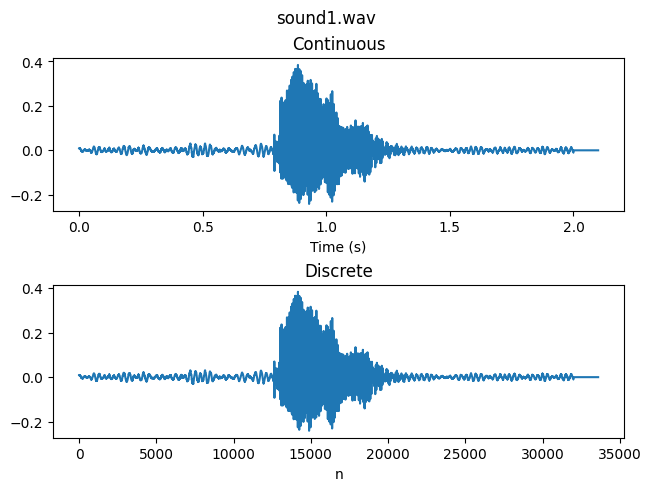

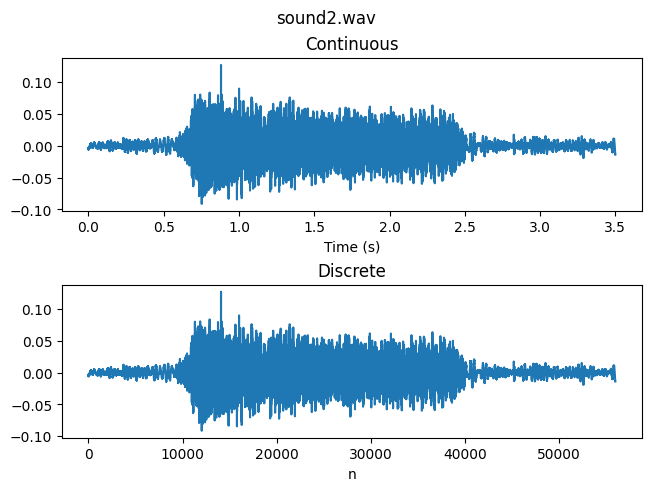

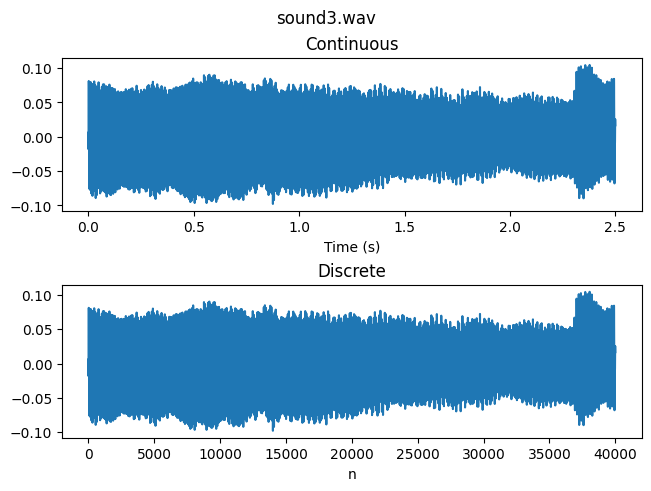

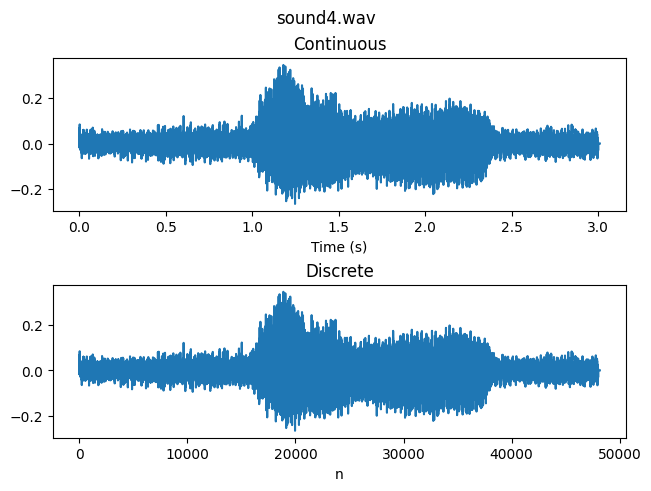

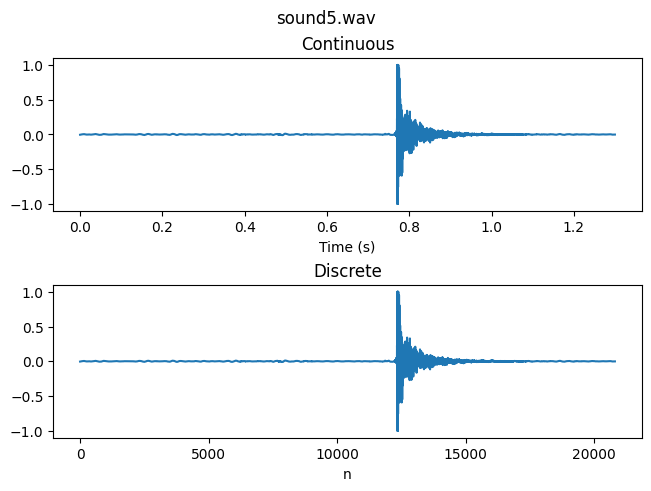

In [24]:
AUDIO_DIR = "../audio"

# set numpy print options to print only 10 elements of an array
np.set_printoptions(threshold=10)

# get the signal and the sampling frequency of .wav files
fs1, y1 = wav.read(os.path.join(AUDIO_DIR, "sound1.wav"))
fs2, y2 = wav.read(os.path.join(AUDIO_DIR, "sound2.wav"))
fs3, y3 = wav.read(os.path.join(AUDIO_DIR, "sound3.wav"))
fs4, y4 = wav.read(os.path.join(AUDIO_DIR, "sound4.wav"))
fs5, y5 = wav.read(os.path.join(AUDIO_DIR, "sound5.wav"))

# normalize the signals to match matlab behavior
# samples are 16-bit signed integers
y1 = y1 / 2**15
y2 = y2 / 2**15
y3 = y3 / 2**15
y4 = y4 / 2**15
y5 = y5 / 2**15

# Create a named tuple to store the signals
Signal = namedtuple("Signal", ["y", "fs", "file"])
signals = [
    Signal(y1, fs1, "sound1.wav"),
    Signal(y2, fs2, "sound2.wav"),
    Signal(y3, fs3, "sound3.wav"),
    Signal(y4, fs4, "sound4.wav"),
    Signal(y5, fs5, "sound5.wav"),
]

# Plot and play the signals
for signal in signals:
    plot_continuous_discrete(signal.y, signal.fs, title=signal.file)

    # Play the audio
    # sd.play(y, fs)
    # sd.wait()

## Ejercicio 1.2
Representamos un tramo de 100ms de cada señal en tiempo continuo y calculamos la potencia media, la energía y el periodo fundamental de las señales que sean periodicas.

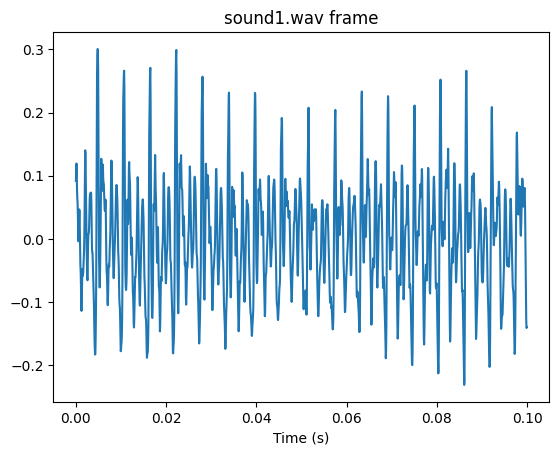

Fundamental frecuecny of signal sound1.wav: 694.7637292464879 hz
Power of sound1.wav: 0.0013667823540024636 W
Energy of sound1.wav: 45.92388709448278 J


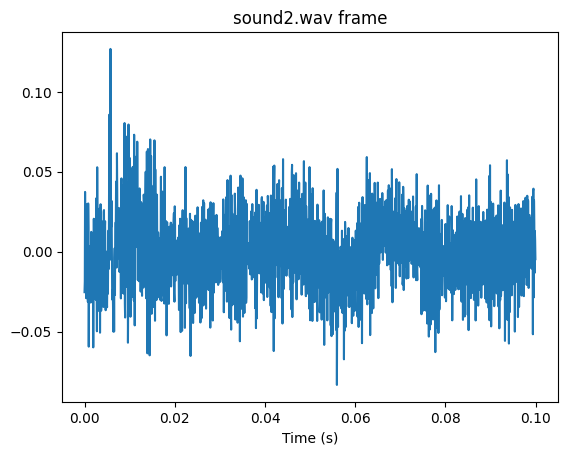

Fundamental frecuecny of signal sound2.wav: 4790.960451977401 hz
Power of sound2.wav: 0.00023101726882985245 W
Energy of sound2.wav: 12.937198071740568 J


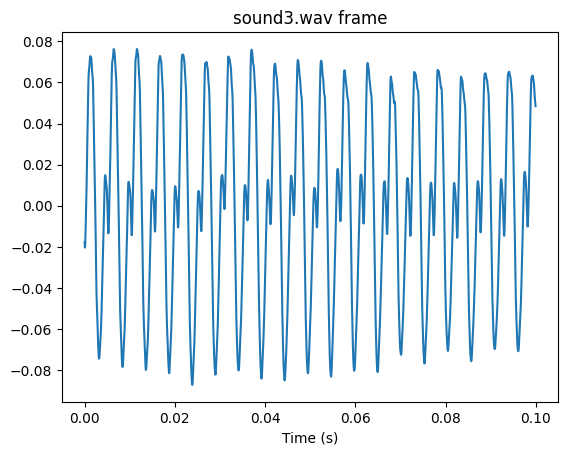

Fundamental frecuecny of signal sound3.wav: 194.0700808625337 hz
Power of sound3.wav: 0.0017629009635537832 W
Energy of sound3.wav: 70.51780144311488 J


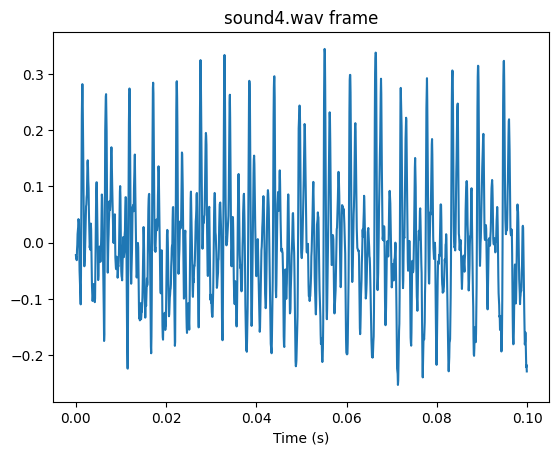

Fundamental frecuecny of signal sound4.wav: 873.0964467005076 hz
Power of sound4.wav: 0.003618658825958556 W
Energy of sound4.wav: 174.27460905816406 J


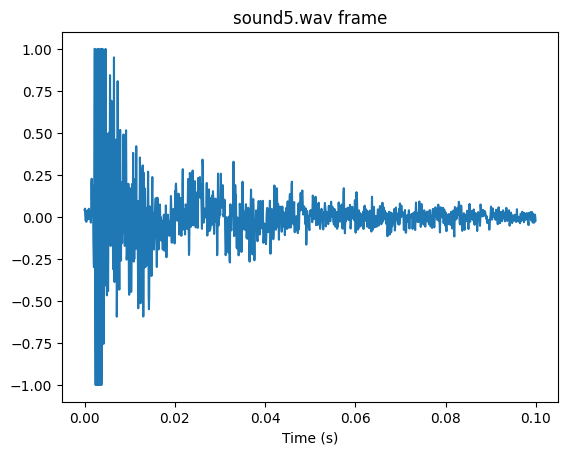

Fundamental frecuecny of signal sound5.wav: 3016.9704588309237 hz
Power of sound5.wav: 0.00247044702086086 W
Energy of sound5.wav: 51.38776848092675 J


In [25]:
# values chosen by hand to get the relevant part of the signals
frames_start = [15000, 14000, 1000, 18000, 12300]

for signal, frame_start in zip(signals, frames_start):
    # calculate the length of the frames
    frame_duration = 0.1
    yframe_len = round(frame_duration * signal.fs)

    # extract the frames from the original signals.
    yframe = signal.y[frame_start : frame_start + yframe_len]

    # plot the frames
    plot_continuous(yframe, signal.fs, title=f"{signal.file} frame")

    # calculate the fundamental frequency of the signals
    fundamental_frequency = calculate_fundamental_frequency(yframe, signal.fs)
    print(f"Fundamental frecuecny of signal {signal.file}: {fundamental_frequency} hz")

    # calculate the power and energy of the signals
    print(f"Power of {signal.file}: {(signal.y ** 2).mean()} W")
    print(f"Energy of {signal.file}: {(signal.y ** 2).sum()} J")

## Ejercicio 1.3
Calculamos la energía de las señales en tramas de 100ms sin solape y las representamos.

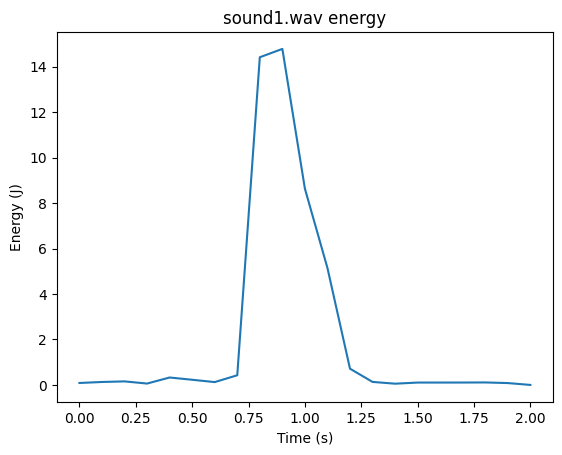

Energy of sound1.wav (non overlapping frames): [8.55939379e-02 1.29535472e-01 1.55837758e-01 ... 1.09188259e-01
 8.16809731e-02 9.29981470e-05] J


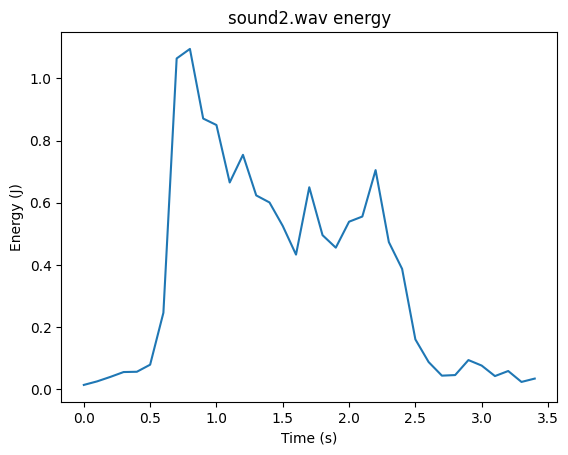

Energy of sound2.wav (non overlapping frames): [0.01466785 0.02605151 0.04042561 ... 0.05937697 0.0242974  0.03503857] J


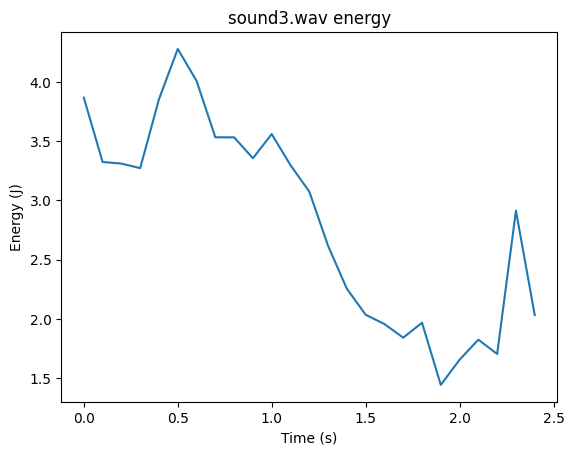

Energy of sound3.wav (non overlapping frames): [3.8680609  3.32501603 3.31144512 ... 1.70272768 2.91374796 2.03156425] J


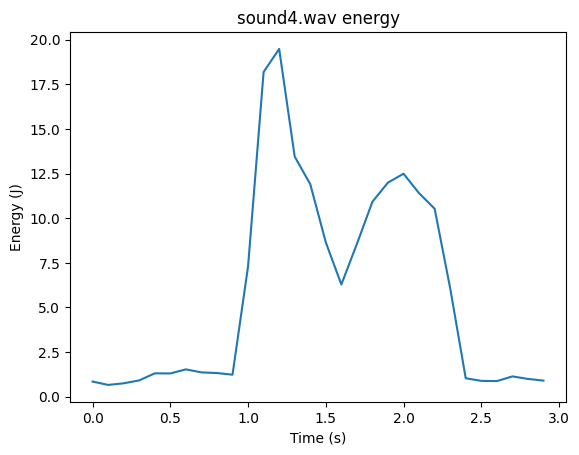

Energy of sound4.wav (non overlapping frames): [0.84988339 0.66106911 0.751822   ... 1.13838931 0.9967622  0.90332989] J


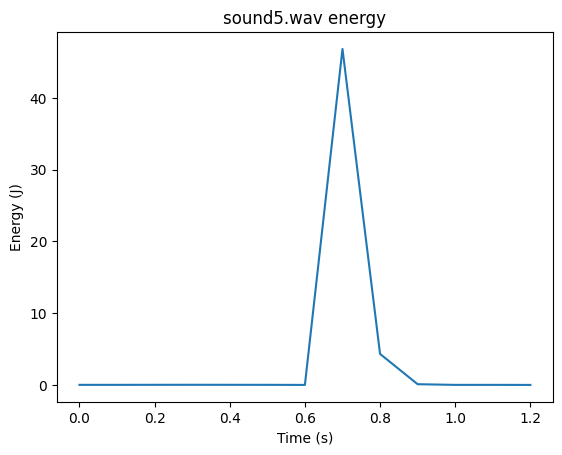

Energy of sound5.wav (non overlapping frames): [0.01364367 0.01474999 0.020434   ... 0.01124525 0.01211548 0.00475643] J


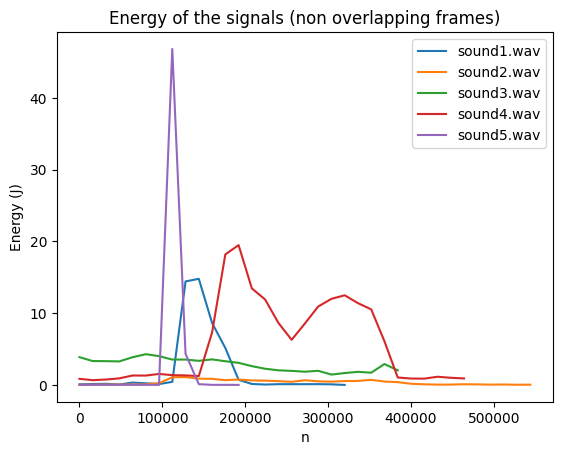

In [26]:
E_frames = []

for signal in signals:
    # get the energy of the signals in overlapping frames of 100ms
    frame_duration = 0.1
    E_frame = (non_overlapping_frames(signal.y, signal.fs, frame_duration) ** 2).sum(
        axis=0
    )
    E_frames.append(E_frame)

    # plot the energy of the signals in continuous time
    fs = 1 / frame_duration
    plot_continuous(E_frame, fs, title=f"{signal.file} energy", ylabel="Energy (J)")
    print(f"Energy of {signal.file} (non overlapping frames): {E_frame} J")

for E_frame in E_frames:
    # add the energy of the signal to the final plot with the energy of all the signals
    t = np.arange(len(E_frame)) * signal.fs
    plt.plot(t, E_frame)

# plot the energy of all the signals in discrete time
plt.xlabel("n")
plt.ylabel("Energy (J)")
plt.title("Energy of the signals (non overlapping frames)")
plt.legend([signal.file for signal in signals])
plt.show()

## Ejercicio 1.4
Calculamos la energía de las señales en tramas de 20ms con solape y las representamos.

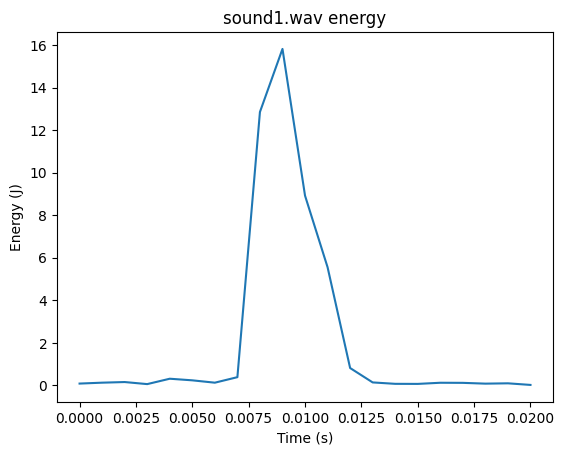

Energy of sound1.wav (non overlapping frames): [0.08559394 0.12789693 0.15730767 ... 0.08238329 0.09748746 0.02212964] J


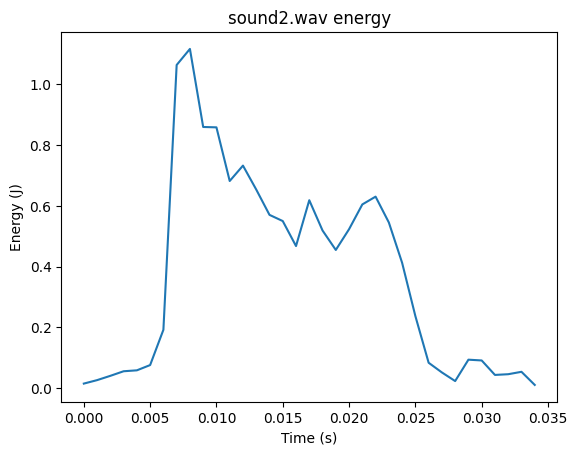

Energy of sound2.wav (non overlapping frames): [0.01466785 0.02607463 0.04021854 ... 0.0455549  0.05347907 0.01029016] J


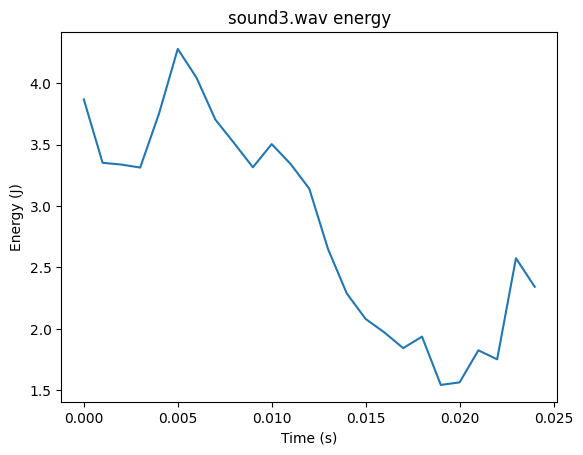

Energy of sound3.wav (non overlapping frames): [3.8680609  3.35182966 3.33751165 ... 1.75181221 2.57490669 2.34248615] J


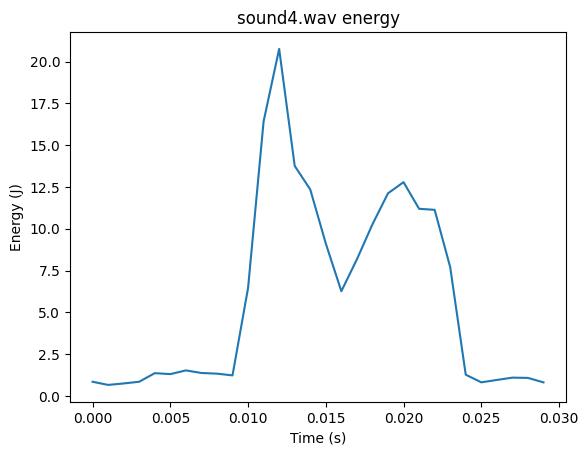

Energy of sound4.wav (non overlapping frames): [0.84988339 0.66084462 0.74890517 ... 1.09704474 1.08035985 0.81251218] J


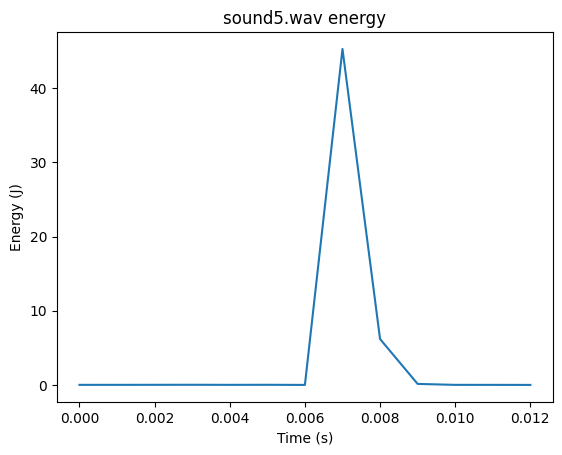

Energy of sound5.wav (non overlapping frames): [0.01364367 0.01478586 0.01987451 ... 0.01322687 0.01186221 0.00544671] J


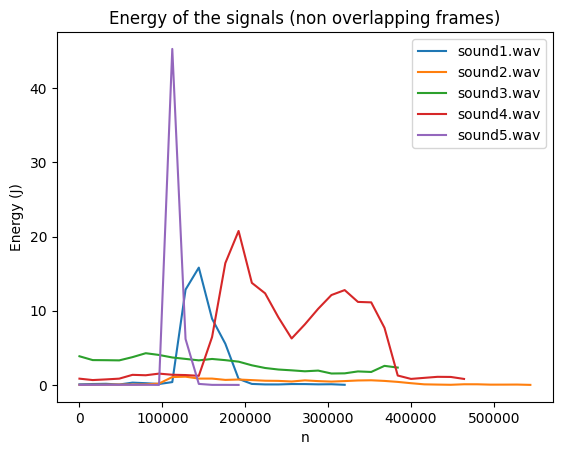

In [27]:
E_frames = []

for signal in signals:
    # get the energy of the signals in overlapping frames of 100ms
    overlap = 0.5
    frame_duration = 0.02
    E_frame = (
        overlapping_frames(signal.y, signal.fs, frame_duration, overlap) ** 2
    ).sum(axis=0)
    E_frames.append(E_frame)

    # plot the energy of the signals in continuous time
    fs = 1 / (frame_duration * overlap)
    plot_continuous(E_frame, fs, title=f"{signal.file} energy", ylabel="Energy (J)")
    print(f"Energy of {signal.file} (non overlapping frames): {E_frame} J")

for E_frame in E_frames:
    # add the energy of the signal to the final plot with the energy of all the signals
    t = np.arange(len(E_frame)) * signal.fs
    plt.plot(t, E_frame)

# plot the energy of all the signals in discrete time
plt.xlabel("n")
plt.ylabel("Energy (J)")
plt.title("Energy of the signals (non overlapping frames)")
plt.legend([signal.file for signal in signals])
plt.show()